<a href="https://www.kaggle.com/code/mrstorvo/superpowers-marvel-characteres?scriptVersionId=108555927" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marvel-characters/Marvel Characters.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# OPEN FILE
data = pd.read_csv("../input/marvel-characters/Marvel Characters.csv", sep = ',')
data.head()

,char,charname,birthname,types,universes,birthplace,superpowers,religions,gender,occupation,memberof
0,http://www.wikidata.org/entity/Q18754954,Silk,Cindy Moon,"mutate, comics character","Earth-616, Marvel Universe",NaN,"superhuman agility / reflexes, superhuman dura...",NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q3127430,Snowbird,Narya,"demigod or quasi-deity in a work of fiction, c...",Marvel Universe,NaN,"flight, shapeshifting, superhuman strength, re...",NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q546340,Thunderbird,John Proudstar,"television character, animated character, mutant",Marvel Universe,NaN,"superhuman durability, superhuman speed, super...",NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q1194236,Cannonball,Samuel Zachery Guthrie,"superhero film character, animated character, ...","Earth-616, Marvel Universe",NaN,thermo-chemical energy,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q2087326,Shriek,Frances Louise Barrison,"film character, comics character",Marvel Universe,NaN,sonic scream,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   char         137 non-null    object
 1   charname     137 non-null    object
 2   birthname    137 non-null    object
 3   types        137 non-null    object
 4   universes    137 non-null    object
 5   birthplace   6 non-null      object
 6   superpowers  137 non-null    object
 7   religions    6 non-null      object
 8   gender       6 non-null      object
 9   occupation   6 non-null      object
 10  memberof     6 non-null      object
dtypes: object(11)
memory usage: 11.9+ KB


In [5]:
# SOME COLUMNS DOESN'T HAVE INFORMATION
data = data.drop(columns = ['char', 'birthplace', 'religions', 'gender', 'occupation', 'memberof'])
data.head()

,charname,birthname,types,universes,superpowers
0,Silk,Cindy Moon,"mutate, comics character","Earth-616, Marvel Universe","superhuman agility / reflexes, superhuman dura..."
1,Snowbird,Narya,"demigod or quasi-deity in a work of fiction, c...",Marvel Universe,"flight, shapeshifting, superhuman strength, re..."
2,Thunderbird,John Proudstar,"television character, animated character, mutant",Marvel Universe,"superhuman durability, superhuman speed, super..."
3,Cannonball,Samuel Zachery Guthrie,"superhero film character, animated character, ...","Earth-616, Marvel Universe",thermo-chemical energy
4,Shriek,Frances Louise Barrison,"film character, comics character",Marvel Universe,sonic scream


In [6]:
# BY STUDYING THE DATA, I FOUND IT INTERESTING TO FIND OUT WHICH THE SUPERPOWERS APPEARED THE MOST IN THE CHARACTERS.
# ONLY THE SUPERPOWERS WILL BE USED.
data_sp = data.drop(columns = ['charname', 'birthname', 'types', 'universes'])
data_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   superpowers  137 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [7]:
# COUNTING SUPERPOWERS
# FIRST, GET THE DATA...
k = 0

while k < (len(data_sp)):
  data_sp['superpowers'][k] = data_sp['superpowers'][k].split(", ")
  k += 1
data_sp

,superpowers
0,"[superhuman agility / reflexes, superhuman dur..."
1,"[flight, shapeshifting, superhuman strength, r..."
2,"[superhuman durability, superhuman speed, supe..."
3,[thermo-chemical energy]
4,[sonic scream]
...,...
132,"[superhuman agility / reflexes, superhuman dur..."
133,[pyrokinesis]
134,[elasticity]
135,"[superhuman durability, superhuman speed, supe..."


In [8]:
# SUPERPOWERS LIST (ALL)
# ... THEN, WE CAN TAKE ALL THE SUPERPOWERS IN ONE LIST
list_sp_all = []

k1 = 0

while k1 < (len(data_sp)):
  k2 = 0
  while k2 < (len(data_sp['superpowers'][k1])):
    list_sp_all.append(data_sp['superpowers'][k1][k2])

    k2 += 1

  k1 += 1

list_sp_all

['superhuman agility / reflexes',
 'superhuman durability',
 'superhuman speed',
 'superhuman strength',
 'flight',
 'shapeshifting',
 'superhuman strength',
 'retrocognition',
 'superhuman durability',
 'superhuman speed',
 'superhuman strength',
 'thermo-chemical energy',
 'sonic scream',
 'superhuman durability',
 'superhuman speed',
 'reality warping',
 'teleportation',
 'immortality',
 'superhuman strength',
 'levitation',
 'force field',
 'healing factor',
 'psychokinesis',
 'time travel',
 'telepathy',
 'superhuman durability',
 'superhuman speed',
 'superhuman strength',
 'healing factor',
 'technopathy',
 'electrokinesis',
 'magnetism manipulation',
 'electromagnetism manipulation',
 'magnetism manipulation',
 'flight',
 'flight',
 'power mimicry or absorption',
 'magnetism manipulation',
 'electrokinesis',
 'force field',
 'healing factor',
 'intangibility',
 'superhuman senses',
 'superhuman speed',
 'superhuman strength',
 'lycanthropy',
 'healing factor',
 'shapeshifting',

In [9]:
# SUPERPOWERS LIST (NAMES)
# THIS LIST PRESENTS THE LIST OS SUPERPOWERS THAT APEARS AT LEAST IN ONE OF THE CHARACTERS
list_sp = list(set(list_sp_all))
list_sp.sort()
list_sp

['aerokinesis',
 'armor',
 'astral projection',
 'body hopping',
 'chronokinesis',
 'clairvoyance',
 'cryokinesis',
 'elasticity',
 'electrokinesis',
 'electromagnetism manipulation',
 'energy blasts',
 'energy manipulation',
 'enhanced smell',
 'flight',
 'force field',
 'healing factor',
 'hydrokinesis',
 'immortality',
 'inorganic',
 'intangibility',
 'invisibility',
 'invulnerability',
 'kinetic absorption',
 'levitation',
 'lycanthropy',
 'magic in fiction',
 'magnetism manipulation',
 'memory manipulation',
 'mind control',
 'night vision',
 'optic blasts',
 'photokinesis',
 'power mimicry or absorption',
 'precognition',
 'probability manipulation',
 'psychokinesis',
 'pyrokinesis',
 'reality warping',
 'resurrection',
 'retrocognition',
 'shapeshifting',
 'sonic scream',
 'superhuman agility / reflexes',
 'superhuman durability',
 'superhuman endurance',
 'superhuman longevity',
 'superhuman senses',
 'superhuman speed',
 'superhuman strength',
 'technopathy',
 'telepathy',
 't

In [10]:
# COUNTING SUPERPOWERS (LIST)
number_sp = []

k = 0

while k < (len(list_sp)):
  n_sp = list_sp_all.count(list_sp[k])
  number_sp.append(n_sp)

  k += 1

number_sp

[1,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 4,
 1,
 4,
 5,
 3,
 22,
 5,
 26,
 1,
 6,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 1,
 5,
 1,
 3,
 1,
 2,
 3,
 4,
 4,
 3,
 7,
 8,
 7,
 1,
 1,
 7,
 3,
 33,
 44,
 4,
 5,
 18,
 37,
 64,
 3,
 14,
 8,
 1,
 2,
 3,
 1,
 1]

In [11]:
#  I CREATED A DATAFRAME WITH THE SUPERPOWERS AND HOW MANY TIMES IT APPEARS
sp_resume = {'SuperPowers': list_sp, 'Number of Characters': number_sp}

data_sp_resume = pd.DataFrame(data = sp_resume)
data_sp_resume

,SuperPowers,Number of Characters
0,aerokinesis,1
1,armor,1
2,astral projection,3
3,body hopping,2
4,chronokinesis,1
5,clairvoyance,1
6,cryokinesis,2
7,elasticity,2
8,electrokinesis,4
9,electromagnetism manipulation,1


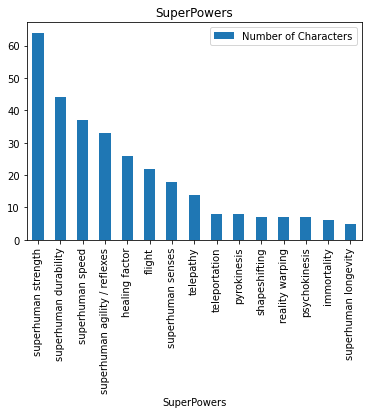

In [12]:
# TOP15 SUPERPOWERS

data_sp_resume.sort_values('Number of Characters', ascending=False)[:15].plot(x='SuperPowers',kind='bar')
plt.title("SuperPowers")
plt.show()